In [2]:
import numpy as np
from queue import PriorityQueue
import matplotlib.pyplot as plt
from astar_utils import get_neighbor_nodes, is_out_of_bounds, reconstruct_path
from astar_utils import load_board, plot_board, create_video_from_frames

Following cell defines heuristic function $h(n)$ as a Manhattan distance between two points. <br>
We do not define actual cost $g(n)$ since it is simply counting number of steps.

In [3]:
def heuristic_func(xy0, xy1):
    """We will use Manhattan distance as the heuristic function."""
    h = abs(xy0[0] - xy1[0]) + abs(xy0[1] - xy1[1])
    return h

Here we define direction we can move, starting and goal coordinate, and load the board.

In [4]:
DIRECTION_MOVES = [(0,1), (0,-1), (-1,0), (1, 0)] # down, up, left, right

board = load_board('maze/3.png')
XY_WALLS = tuple(zip(*np.where(board==np.inf))) # walls
XY_STARTING = (1, 1)  # starting node
XY_GOAL = (8, 3)  # target node

maze is plot along with starting and target node.

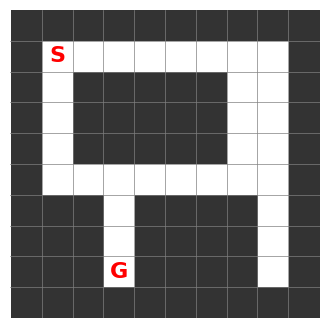

In [5]:
plot_board(board, None, XY_STARTING, XY_GOAL)

heuristic search is here:

In [6]:
frames = [] # to create an animation.
enable_animation = True


G = board.copy() # table storing actual cost g(n)
F = board.copy() # table storing f(n) = g(n) + h(n)
G[XY_STARTING] = 0
F[XY_STARTING] = G[XY_STARTING] + heuristic_func(XY_STARTING, XY_GOAL)
bestPath = None

current_node = XY_STARTING
frontier = PriorityQueue()
frontier.put((F[XY_STARTING], XY_STARTING))
explored_set = set()
came_from = {}
while not frontier.empty(): 
    if enable_animation: 
        frame = plot_board(F, current_node, XY_STARTING, XY_GOAL, frontier, came_from, None, return_frame=True)
        frames.append(frame)
        
    cost, current_node = frontier.get() # get the node with lowest f(n) and remove it from the queue.
    explored_set.add(current_node)
    
    if current_node == XY_GOAL:
        bestPath = reconstruct_path(came_from, XY_STARTING, XY_GOAL)
        if enable_animation:
            frame = plot_board(F, current_node, XY_STARTING, XY_GOAL, frontier, came_from, bestPath, return_frame=True)
            frames.append(frame)
        break
    child_nodes = get_neighbor_nodes(current_node, DIRECTION_MOVES)
    for child in child_nodes:
        if is_out_of_bounds(child, board.shape) or (child in XY_WALLS) or (child in explored_set):
            continue
        G[child] = G[current_node] + 0 # cost 1 point per move.
        h = heuristic_func(child, XY_GOAL)
        f = G[child] + h
        if f < F[child]:
            F[child] = f
            frontier.put((f, child))
            came_from[child] = current_node

exporting as video.. this may not work if you do not have the codec.

In [7]:
video = create_video_from_frames(frames, 'maze3_greedy.mp4', fps=2)
video

the alternative to video is to plot it frame by frame.

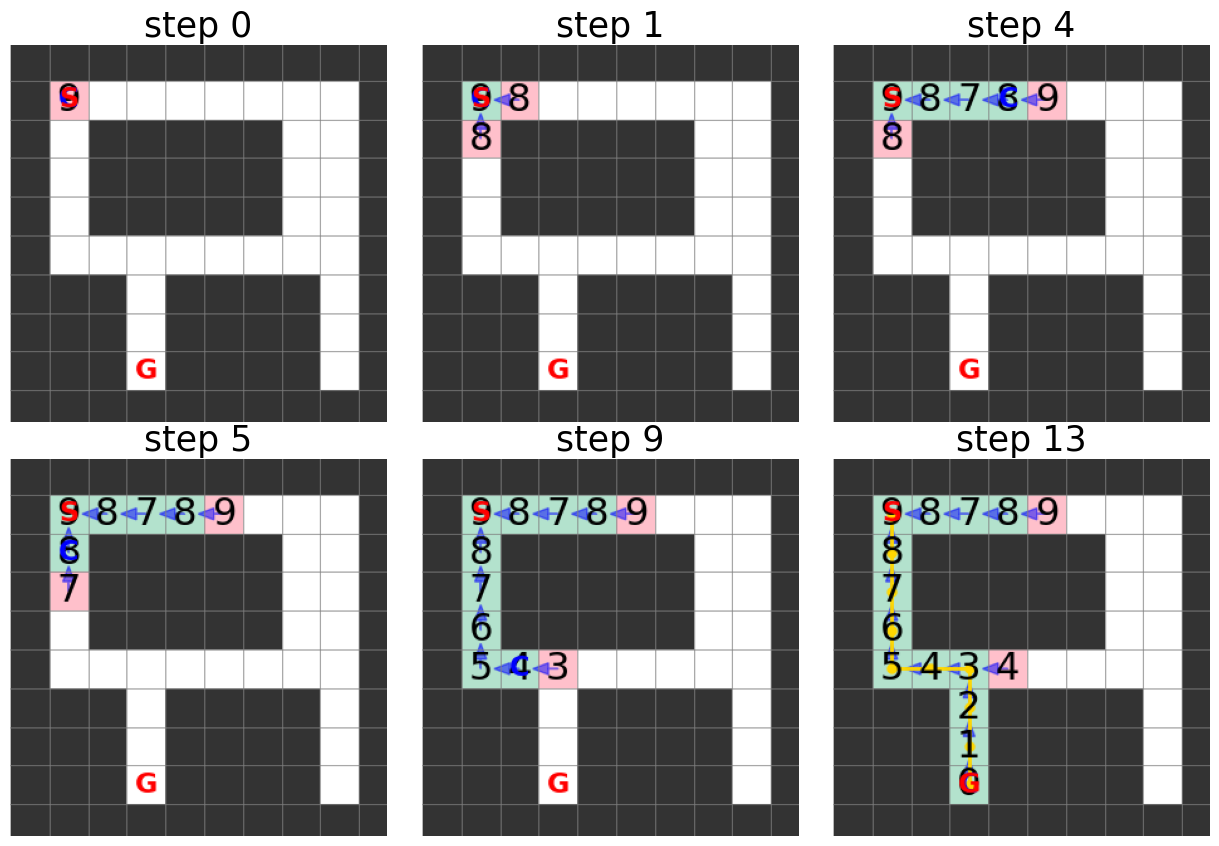

: 

In [9]:
frame_indices = [0, 1, 4, 
                 5, 9, len(frames)-1]
fig, axes = plt.subplots(2, 3, figsize=(12.5, 8.5))
axes = axes.ravel()
for i, i_frame in enumerate(frame_indices):
    axes[i].imshow(frames[i_frame])
    axes[i].set_xlim(50, 350)
    axes[i].set_ylim(350, 50)
    axes[i].axis('off')
    axes[i].set_title(f'step {i_frame}', fontdict={"fontsize": 25})
plt.tight_layout()